In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Social_Network.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#performing EDA
# getting to know the shape
#renamming the rwo/column
#droping the unrequired column/row
#droping the null/missing value


In [6]:
df.shape

(400, 5)

In [11]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
Gender_Male        uint8
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [43]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [44]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
# droping unimportant colums
df=df.drop(['User ID'],axis=1)       #axis0=row and axis1=column
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
#converting categorical values to numerical
df = pd.get_dummies(df,drop_first= True)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [15]:
#seperating X and y
X=df.loc[:,['Age','EstimatedSalary','Gender_Male']].values
y=df.loc[:,['Purchased']].values

In [16]:
X

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]])

In [17]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
#Feature Scalling also knowna s data normalization

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [21]:
#model was expecting a 1d array as input
y = y.reshape(-1)

In [22]:
y.shape

(400,)

In [57]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)

In [25]:
#importing classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Selecting the k value.

In [54]:
neighbours=np.arange(1,11)
test_acc=np.empty(len(neighbours))
train_acc=np.empty(len(neighbours))

In [46]:
for i,k in enumerate(neighbours):   
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_acc[i]=knn.score(X_train,y_train)
    test_acc[i]=knn.score(X_test,y_test)

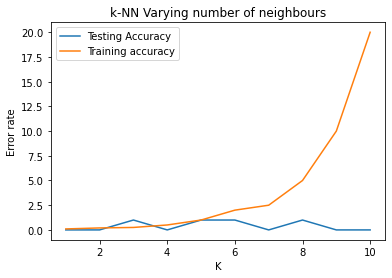

In [58]:
plt.title('k-NN Varying number of neighbours')
plt.plot(neighbours, test_acc, label='Testing Accuracy')
plt.plot(neighbours, train_acc, label='Training accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [ ]:
# from the above graph we can consider K value as 7 which is tending to reach minimum

In [59]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
accuracy_score(y_test,pred)

0.95